<a href="https://www.kaggle.com/code/gargivipat/obesity-risk-eda-classification?scriptVersionId=162015805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv",index_col=0)

In [3]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv",index_col=0)

In [5]:
train_df.shape

(20758, 17)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [7]:
train_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
train_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
train_df.duplicated().sum()

0

In [10]:
col_num = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]

In [11]:
cols = train_df.columns
col_cat = []
for c in cols:
    if c not in col_num:
        col_cat.append(c)

In [12]:
col_num
col_cat

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [13]:
train_df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

## Exploratory Data Analysis

### Univariate analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [15]:
for c in col_cat:
    fig = px.histogram(train_df,x=c)
    fig.show()

In [16]:
for c in col_num:
    fig = px.histogram(train_df,x=c)
    fig.show()

### Bivariate Analysis

In [17]:
df_num = train_df.select_dtypes([np.number])

In [18]:
df_num.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


<Axes: >

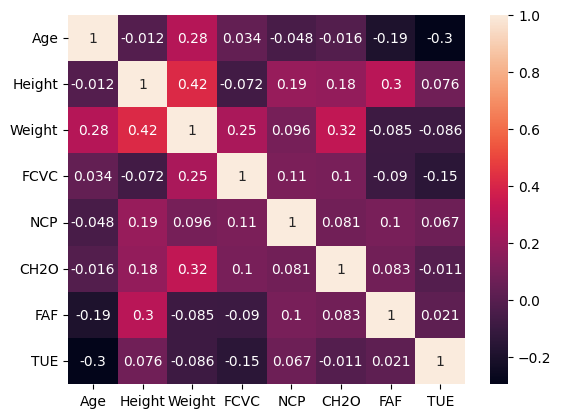

In [19]:
sns.heatmap(df_num.corr(),annot=True)

In [20]:
# Dataframe Creation
family_history_df = (train_df.loc[train_df["family_history_with_overweight"]=="yes"]
                     .groupby(["NObeyesdad"])
                     .size()
                     .reset_index(name="Counts")
                     .sort_values(by=["NObeyesdad"]))

In [21]:
# Dataframe Creation
Gender_df = (train_df.loc[train_df["Gender"]=="Female"]
                     .groupby(["NObeyesdad"])
                     .size()
                     .reset_index(name="Counts")
                     .sort_values(by=["NObeyesdad"]))

In [22]:
Gender_df.head()

,NObeyesdad,Counts
0,Insufficient_Weight,1621
1,Normal_Weight,1660
2,Obesity_Type_I,1267
3,Obesity_Type_II,8
4,Obesity_Type_III,4041


In [23]:
fig = make_subplots(rows=1,cols=2,specs=[[{"type":"domain"},
                                         {"type":"domain"}]])

colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
    "rgb(4,3,10.625)"
]
fig.add_trace(
    go.Pie(labels=family_history_df["NObeyesdad"].unique(),
          values = family_history_df["Counts"],
          name = "family History",
          marker_colors = colors),
    1,
    1
)

fig.add_trace(
    go.Pie(
    labels=Gender_df['NObeyesdad'].unique(),
    values=Gender_df['Counts'],
    name='Gender Weight',
    marker_colors=colors),
    1,
    2
)

fig.update_traces(hole=0.4)
fig.update_layout(
title_text="Obdesity Ratio on the Basis of Gender and Family History",
annotations=[
    dict(text="Family",x=0.18,y=0.5,font_size=17,
        showarrow=False),
    dict(text="Gender",x=0.82,y=0.5,font_size=17,
        showarrow=False)
])
fig.show()


In [24]:
# Dataframe Creation
family_neg_history_df = (train_df.loc[train_df["family_history_with_overweight"]=="no"]
                     .groupby(["NObeyesdad"])
                     .size()
                     .reset_index(name="Counts")
                     .sort_values(by=["NObeyesdad"]))

In [25]:
# Dataframe Creation
Gender_male_df = (train_df.loc[train_df["Gender"]=="Male"]
                     .groupby(["NObeyesdad"])
                     .size()
                     .reset_index(name="Counts")
                     .sort_values(by=["NObeyesdad"]))

In [26]:
fig = make_subplots(rows=1,cols=2,specs=[[{"type":"domain"},
                                         {"type":"domain"}]])

colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
    "rgb(4,3,10.625)"
]
fig.add_trace(
    go.Pie(labels=family_neg_history_df["NObeyesdad"].unique(),
          values = family_neg_history_df["Counts"],
          name = "family History",
          marker_colors = colors),
    1,
    1
)

fig.add_trace(
    go.Pie(
    labels=Gender_male_df['NObeyesdad'].unique(),
    values=Gender_male_df['Counts'],
    name='Gender Weight',
    marker_colors=colors),
    1,
    2
)

fig.update_traces(hole=0.4)
fig.update_layout(
title_text="Obdesity Ratio on the Basis of Gender and Family History",
annotations=[
    dict(text="Family",x=0.18,y=0.5,font_size=17,
        showarrow=False),
    dict(text="Gender",x=0.82,y=0.5,font_size=17,
        showarrow=False)
])
fig.show()